In [1]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

In [2]:
# Step 1: load data 
df_raw = pd.read_excel('/workspaces/clases-4geeks/datasets/Concrete_Data.xls')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [3]:
df_raw.sample(10, random_state=2025)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
565,295.80,0.00,0.00,185.70,0.00,1091.4,769.30,7,14.843729
690,288.00,192.00,0.00,192.00,0.00,932.0,717.80,7,23.523542
636,300.00,0.00,0.00,184.00,0.00,1075.0,795.00,28,26.848195
43,380.00,0.00,0.00,228.00,0.00,932.0,670.00,180,53.104131
720,203.50,305.30,0.00,203.50,0.00,963.4,630.00,90,51.863764
346,213.74,0.00,174.74,154.79,10.16,1053.5,776.35,28,40.148187
149,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
376,376.00,0.00,0.00,214.60,0.00,1003.5,762.36,28,31.971002
605,236.00,0.00,0.00,194.00,0.00,968.0,885.00,3,6.467285
436,172.38,13.61,172.37,156.76,4.14,1006.3,856.40,28,33.687797


In [4]:
#Steap 2. Data preprocessing
df_baking = df_raw.copy()

#Renombrar columnas
df_baking.columns = (
    ['cement', 'blast_furnace_salag', 'fly_ash', 'water', 'superplasticizer',
    'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']
)
df_baking["log_age"] = df_baking['age'].apply(lambda x: np.log(x))

df_baking = df_baking.drop(columns = ['age'])

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_salag            1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   concrete_compressive_strength  1030 non-null   float64
 8   log_age                        1030 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB


In [5]:
# Step 3: EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train, df_val = train_test_split(df_train, test_size=0.15, random_state=2025)

# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_val.shape, df_test.shape

((787, 9), (140, 9), (103, 9))

In [6]:
df_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
cement,787.0,277.511995,103.645635,102.000000,190.340000,260.000000,349.000000,540.000000
blast_furnace_salag,787.0,76.006582,87.306962,0.000000,0.000000,24.000000,145.000000,359.400000
fly_ash,787.0,52.621970,63.618010,0.000000,0.000000,0.000000,118.215000,200.100000
water,787.0,181.943329,21.491940,121.750000,164.900000,185.700000,192.350000,246.900000
superplasticizer,787.0,5.981700,5.856357,0.000000,0.000000,6.000000,10.000000,32.200000
coarse_aggregate,787.0,973.460280,75.675481,801.000000,932.000000,968.000000,1028.400000,1145.000000
fine_aggregate,787.0,774.304015,79.635527,594.000000,734.000000,780.090000,825.000000,992.600000
concrete_compressive_strength,787.0,35.096923,16.585314,2.331808,23.581704,33.398217,44.391912,82.599225
log_age,787.0,3.139099,1.190561,0.000000,1.945910,3.332205,4.025352,5.899897


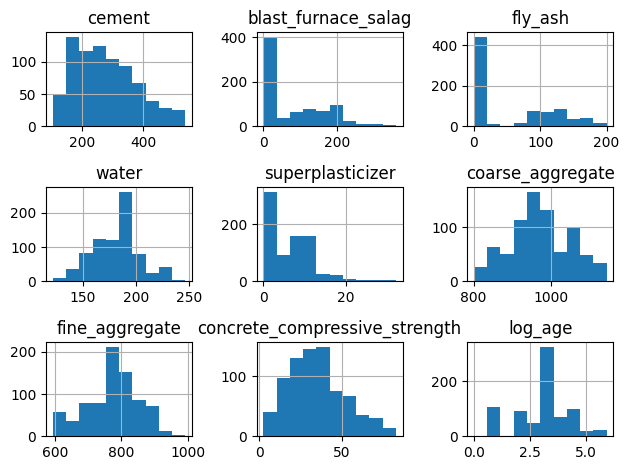

In [7]:
df_train.hist()
plt.tight_layout()
plt.show()

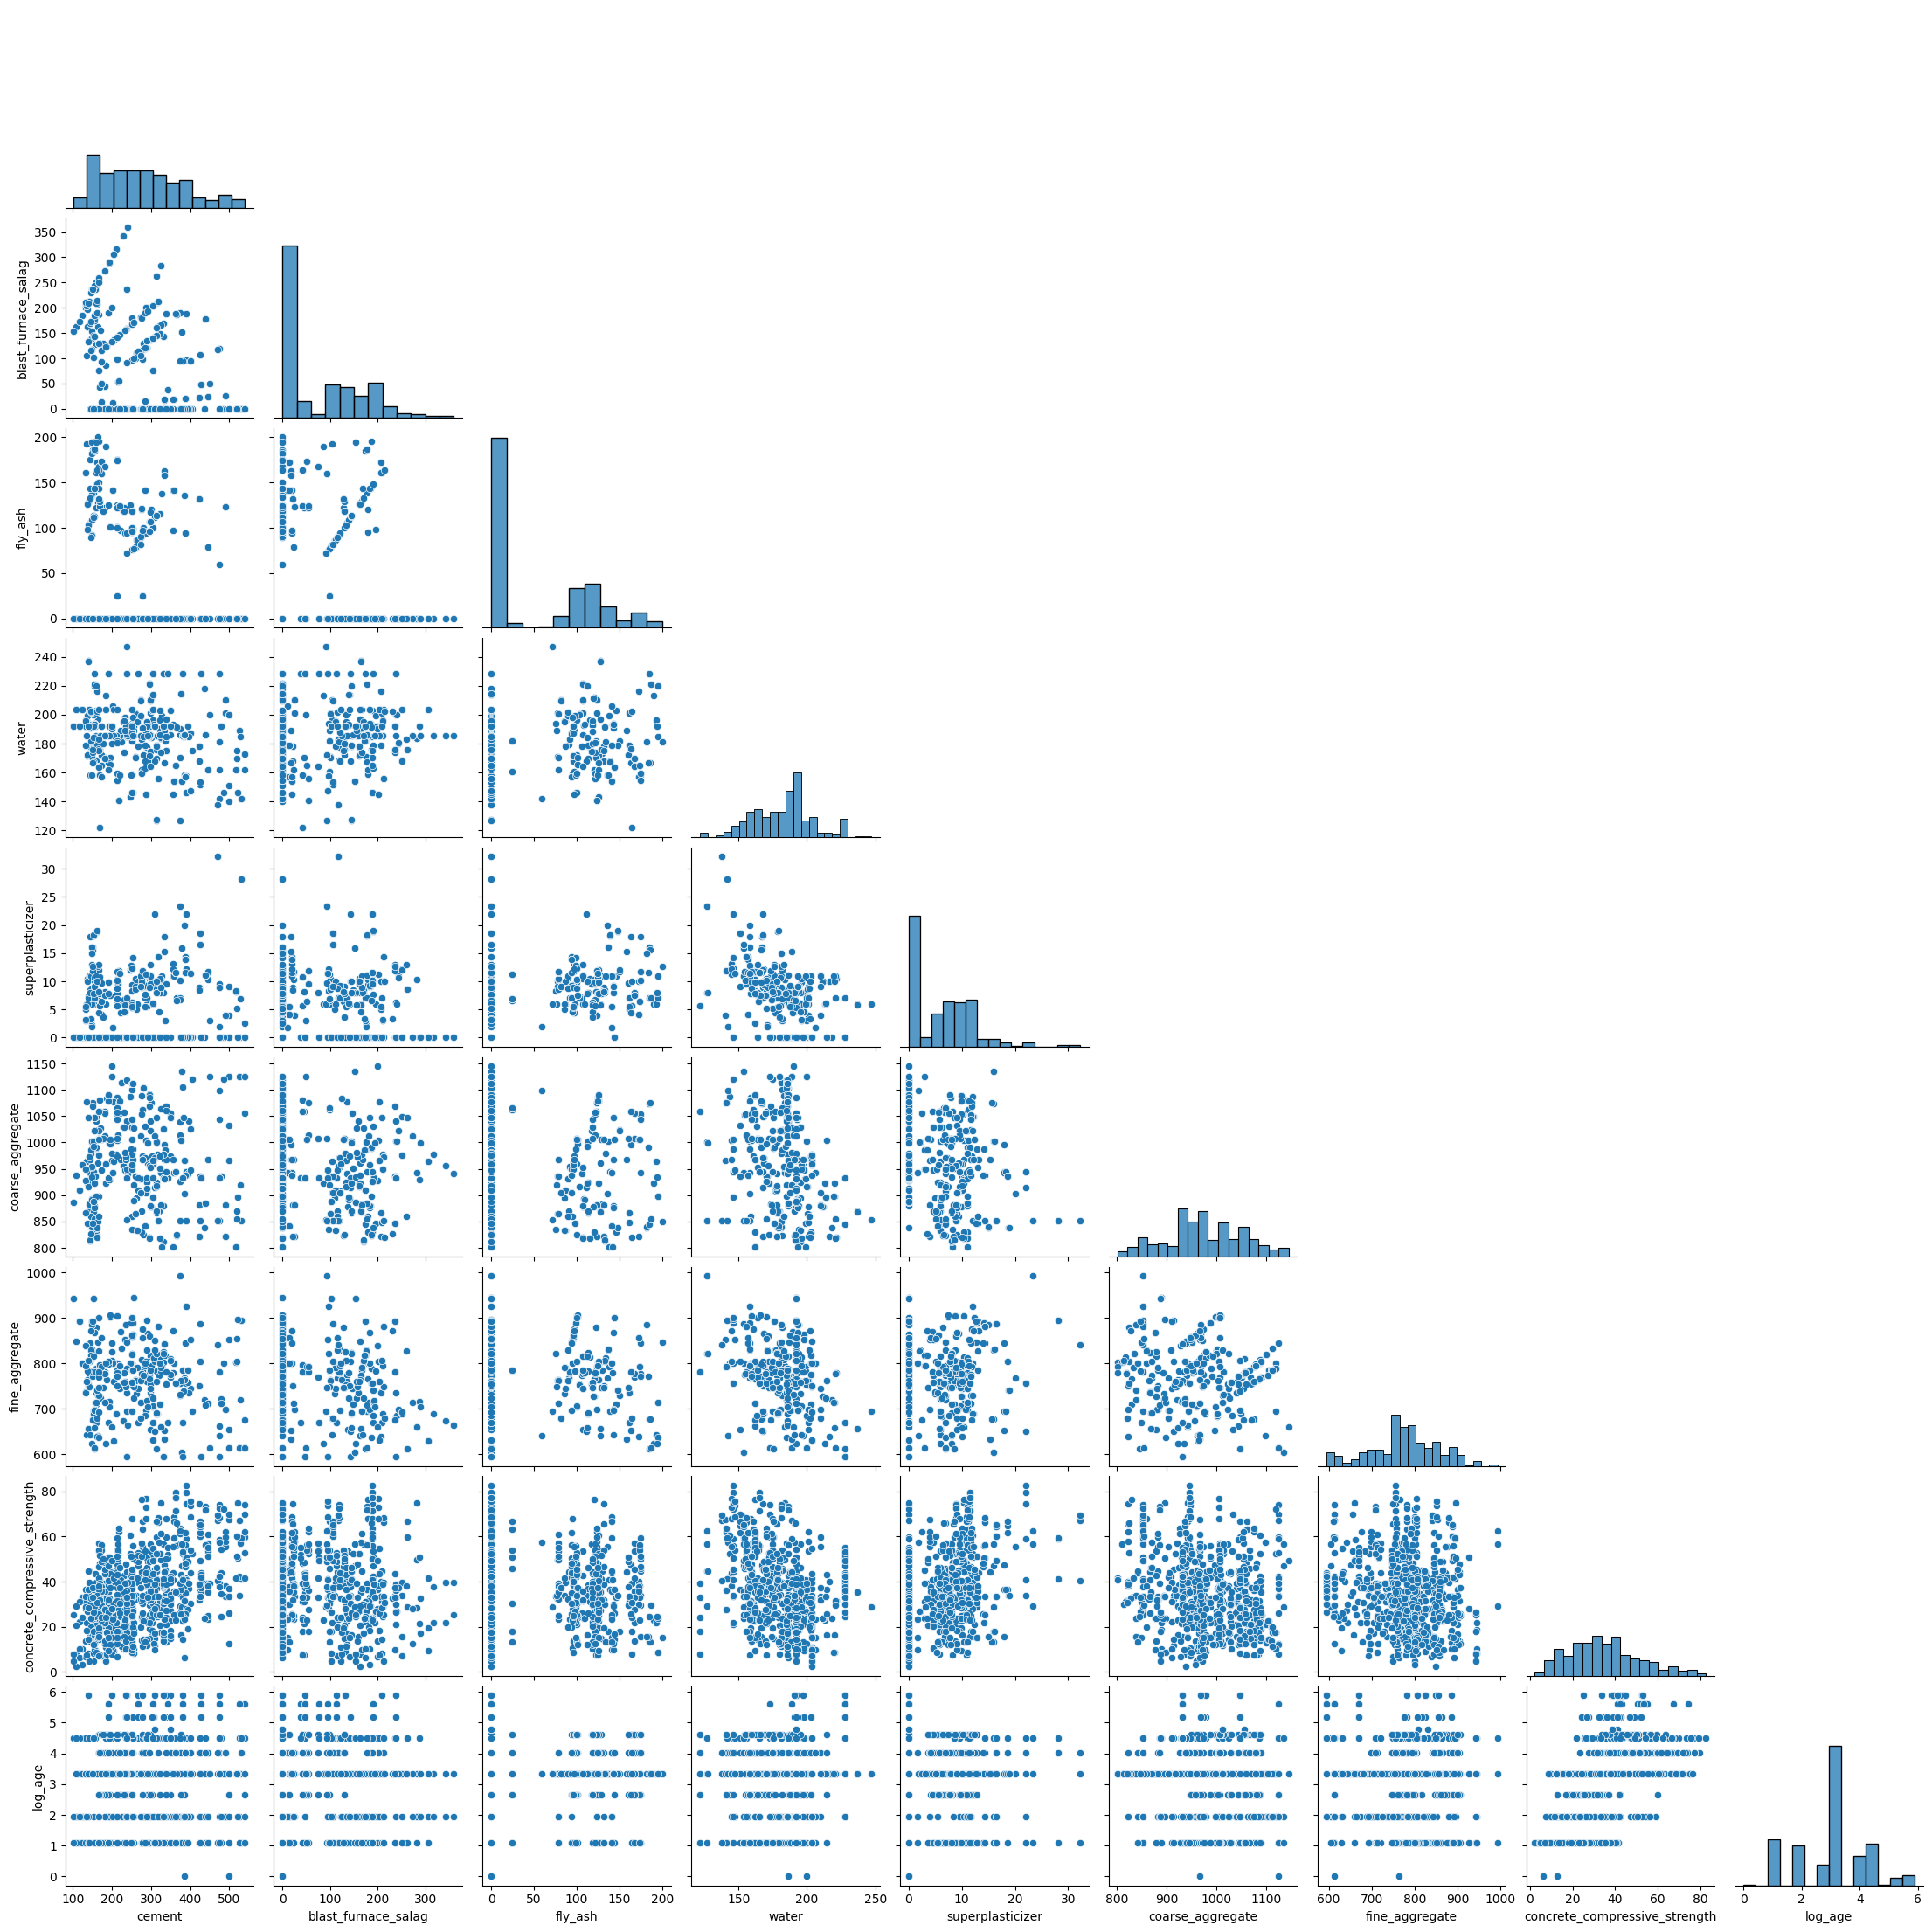

In [8]:
sns.pairplot(df_train, corner=True)
plt.show()

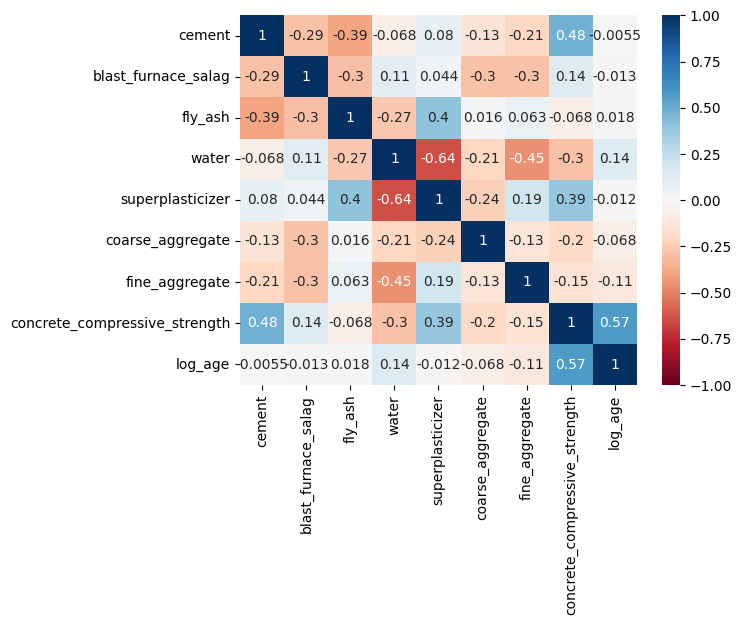

In [9]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

In [10]:
# Step 4: Machine Learning
X_train = df_train.drop(columns='concrete_compressive_strength')
y_train = df_train['concrete_compressive_strength']

X_val = df_val.drop(columns='concrete_compressive_strength')
y_val = df_val['concrete_compressive_strength']

X_test = df_test.drop(columns='concrete_compressive_strength')
y_test = df_test['concrete_compressive_strength']
X_train.shape

(787, 8)

In [11]:
# Pipeline
reg_knn = Pipeline([
    ('proc', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])

reg_knn.fit(X_train, y_train)

,steps,"[('proc', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [12]:
y_hat = reg_knn.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_hat)):.2f}')
print(f'R2: {r2_score(y_val, y_hat):.2f}')

RMSE: 7.34
R2: 0.82


In [13]:
reg_knn_cv = GridSearchCV(
    reg_knn,
    param_grid={
        'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    },
    cv=5
)

reg_knn_cv.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [14]:
reg_knn_cv.best_params_

{'knn__n_neighbors': 3}

In [15]:
y_hat = reg_knn_cv.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_hat)):.2f}')
print(f'R2: {r2_score(y_val, y_hat):.2f}')

RMSE: 6.68
R2: 0.85


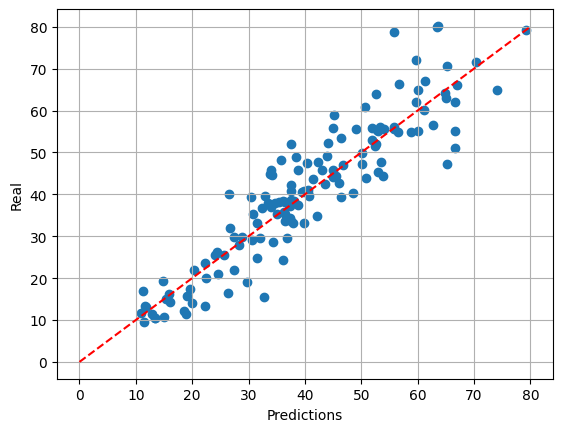

In [16]:
plt.scatter(x=y_hat, y=y_val)
plt.grid(True)
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.plot([0, 80], [0, 80], c='r', linestyle='--', )
plt.show()

In [17]:
# Validate with test data

# Validating other models

In [18]:
clf_tree = Pipeline([
    ('proc', MinMaxScaler()),
    ('tree', DecisionTreeRegressor(max_depth=6,random_state=2025))
])

clf_rf = Pipeline([
    ('proc', MinMaxScaler()),
    ('rf', RandomForestRegressor(random_state=2025))
])

clf_hb = Pipeline([
    ('proc', MinMaxScaler()),
    ('hb', HistGradientBoostingRegressor(random_state=2025))
])

param_grids = {
    'tree':{
        'tree__max_depth':[2,4,5,6,7],
        'tree__min_samples_split':[2,4,6],
    },
    'rf':{
        'rf__max_depth':[2,4,5,6,7],
        'rf__min_samples_split':[2,4,6],
        'rf__n_estimators':[50,100,150,200]
    },
    'hb':{
        'hb__max_depth':[2,4,5,6,7]
    }
}

models = [
          (clf_tree,'Decission Tree', 'tree'),
          (clf_rf,'Random Forest', 'rf'),
          (clf_hb,'Histogram GBoosting', 'hb')
]

performance = {}
for est, name, sname in models:
  print(est, name, sname)
  est.fit(X_train, y_train)
  estimator_cv = GridSearchCV(
      est,
      param_grid = param_grids[sname],
      cv = 5
  )
  estimator_cv.fit(X_train, y_train)
  y_hat = estimator_cv.predict(X_val)
  mse = round(mean_squared_error(y_val, y_hat))
  r2 = round(r2_score(y_val, y_hat), 2)
  best_params = estimator_cv.best_params_
  performance[name] = {
      'MSE': mse,
      'R2 Score': r2,
      'Best Params': best_params,
      'estimator': estimator_cv.best_estimator_
  }

Pipeline(steps=[('proc', MinMaxScaler()),
                ('tree',
                 DecisionTreeRegressor(max_depth=6, random_state=2025))]) Decission Tree tree
Pipeline(steps=[('proc', MinMaxScaler()),
                ('rf', RandomForestRegressor(random_state=2025))]) Random Forest rf


Pipeline(steps=[('proc', MinMaxScaler()),
                ('hb', HistGradientBoostingRegressor(random_state=2025))]) Histogram GBoosting hb


# Tree

In [19]:
tree_reg_cv = DecisionTreeRegressor(max_depth=7, min_samples_split=6)
tree_reg_cv.fit(X_train, y_train)
y_hat = tree_reg_cv.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_hat)):.2f}')
print(f'R2: {r2_score(y_val, y_hat):.2f}')


RMSE: 8.22
R2: 0.77


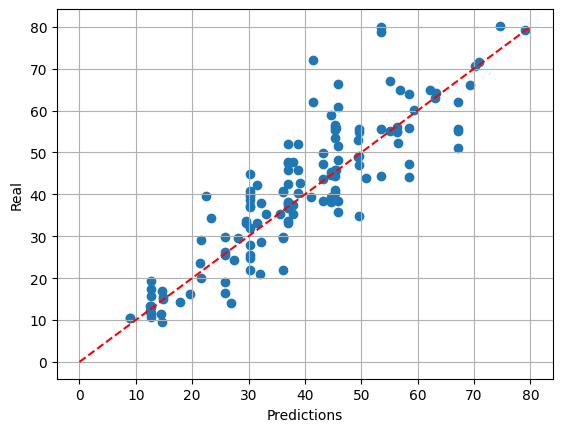

In [20]:
plt.scatter(x=y_hat, y=y_val)
plt.grid(True)
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.plot([0, 80], [0, 80], c='r', linestyle='--', )
plt.show()

# Random Forest

In [21]:
rforest_reg_cv = RandomForestRegressor(max_depth=7, n_estimators=200,random_state=2025)
rforest_reg_cv.fit(X_train, y_train)
y_hat = rforest_reg_cv.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_hat)):.2f}')
print(f'R2: {r2_score(y_val, y_hat):.2f}')

RMSE: 6.07
R2: 0.87


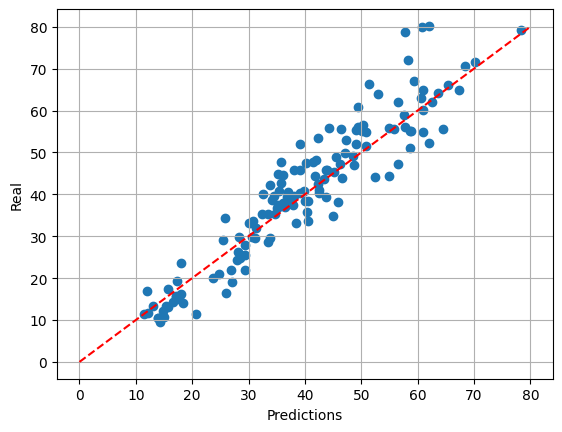

In [22]:
plt.scatter(x=y_hat, y=y_val)
plt.grid(True)
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.plot([0, 80], [0, 80], c='r', linestyle='--', )
plt.show()

# Gradient Boosting

In [23]:
hb_reg_cv = HistGradientBoostingRegressor(max_depth=7)

hb_reg_cv.fit(X_train, y_train)
y_hat = hb_reg_cv.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_hat)):.2f}')
print(f'R2: {r2_score(y_val, y_hat):.2f}')

RMSE: 4.88
R2: 0.92


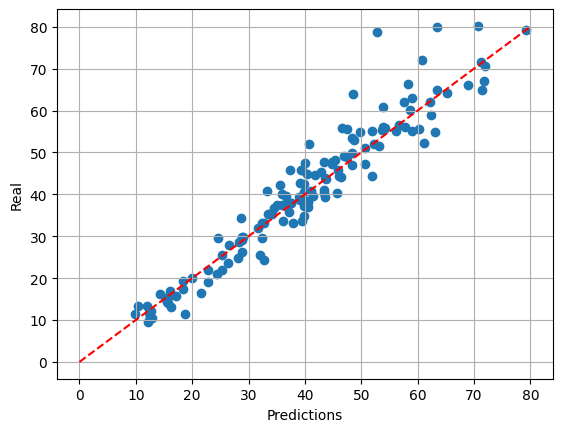

In [24]:
plt.scatter(x=y_hat, y=y_val)
plt.grid(True)
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.plot([0, 80], [0, 80], c='r', linestyle='--', )
plt.show()

In [25]:
df_models = pd.DataFrame(performance)
df_models = df_models.T

df_models['MSE'] = df_models['MSE'].astype('float')
df_models['RMSE'] = np.sqrt(df_models['MSE'])

df_models

,MSE,R2 Score,Best Params,estimator,RMSE
Decission Tree,76.0,0.74,"{'tree__max_depth': 7, 'tree__min_samples_spli...","(MinMaxScaler(), DecisionTreeRegressor(max_dep...",8.717798
Random Forest,37.0,0.87,"{'rf__max_depth': 7, 'rf__min_samples_split': ...","(MinMaxScaler(), (DecisionTreeRegressor(max_de...",6.082763
Histogram GBoosting,24.0,0.92,{'hb__max_depth': 7},"(MinMaxScaler(), HistGradientBoostingRegressor...",4.898979


In [26]:
n_iterations = 50
mse_scores = []
rmse_scores = []
r2_scores = []

for i in range(n_iterations):
  df_rs = resample(df_train)

  # Split data
  X_train_rs = df_rs.drop(columns='concrete_compressive_strength')
  y_train_rs = df_rs['concrete_compressive_strength']

  X_train_rs = X_train_rs.reset_index(drop=True)
  y_train_rs = y_train_rs.reset_index(drop=True)

  # Learning
  hb_reg_cv.fit(X_train_rs, y_train_rs)

  # Prediction
  y_hat = hb_reg_cv.predict(X_test)

  # Metrics
  mse = round(mean_squared_error(y_test, y_hat), 2)
  rmse = np.sqrt(mse)
  r2 = round(r2_score(y_test, y_hat), 2)

  # Add to lists
  mse_scores.append(mse)
  rmse_scores.append(rmse)
  r2_scores.append(r2)


In [27]:
hb_reg_cv

,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,7
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [28]:
np.mean(rmse_scores)

np.float64(5.035085320919597)

In [29]:
print(f'RMSE: {np.mean(rmse_scores):.2f} +/- {(1.96 * np.std(rmse_scores)):.2f}')

RMSE: 5.04 +/- 0.63


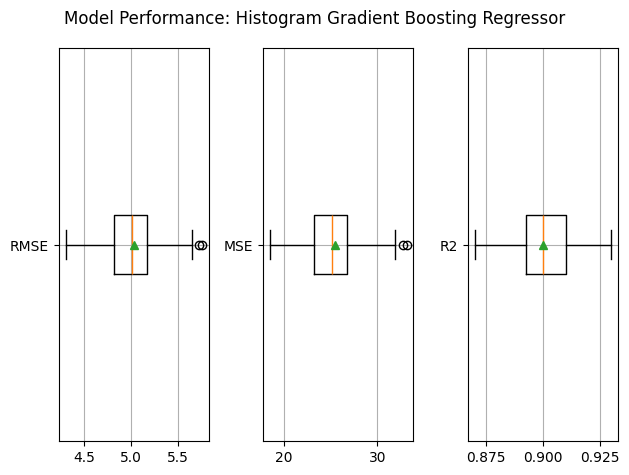

RMSE: 5.04 +/- 0.63
MSE: 25.46 +/- 6.46
R2: 0.90 +/- 0.03


In [30]:
fig, ax = plt.subplots(1, 3)

ax[0].boxplot(x=rmse_scores, vert=False, showmeans=True)
ax[0].grid(True)
ax[0].set_yticks([1], ['RMSE'])

ax[1].boxplot(x=mse_scores, vert=False, showmeans=True)
ax[1].grid(True)
ax[1].set_yticks([1], ['MSE'])

ax[2].boxplot(x=r2_scores, vert=False, showmeans=True)
ax[2].grid(True)
ax[2].set_yticks([1], ['R2'])

plt.suptitle('Model Performance: Histogram Gradient Boosting Regressor')
plt.tight_layout()
plt.show()

print(f'RMSE: {np.mean(rmse_scores):.2f} +/- {(1.96 * np.std(rmse_scores)):.2f}')
print(f'MSE: {np.mean(mse_scores):.2f} +/- {(1.96 * np.std(mse_scores)):.2f}')
print(f'R2: {np.mean(r2_scores):.2f} +/- {(1.96 * np.std(r2_scores)):.2f}')